## Instruction
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- Describe the steps in the "Description:" field.

## Group Information

Group No: Cancer_2

- Member 1: Foo Ling Zhen
- Member 2: Dean Lau Sheng Ting
- Member 3: Looi Wei En
- Member 4: Eason Peng 


## Import libraries

In [1110]:
%config Completer.use_jedi=False

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler


## Load the dataset

In [1111]:
df= pd.read_csv('risk_factors.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [1112]:
df.shape

(858, 36)

In [1113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [1114]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


The dataframe has 858 entries and 36 columns, consisting of datatypes int64 and object. There no null values detected in the dataframe.

Out of 4 target columns - Hinselmann, Schiller, Cytology and Biopsy, the target 

In [1115]:
# Assigning features to X
X = df.drop('Biopsy', axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [1116]:
X.shape


(858, 35)

In [1117]:
# Assigning column 'Biopsy' as the target, y
y = df['Biopsy']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 858 entries, 0 to 857
Series name: Biopsy
Non-Null Count  Dtype
--------------  -----
858 non-null    int64
dtypes: int64(1)
memory usage: 6.8 KB


In [1118]:
y.shape

(858,)

## Split the dataset
Split the dataset into training, validation and test sets.

In [1119]:
#split into 80:10:10

#splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=0)

#splitting training and validation set 
X_train, X_vald, y_train, y_vald = train_test_split(X, y, test_size = 0.1,random_state=0)


In [1120]:
print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)

(772, 35)
(86, 35)
(86, 35)


In [1121]:
print(y_train.shape)
print(y_vald.shape)
print(y_test.shape)

(772,)
(86,)
(86,)


## Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:
In this data preprocessing operation, we perform the following in order:
1. Missing Value Detection and Replacement
2. Outlier Detection
3. Deal with Imbalanced Data
4. Data Normalization
5. Data Standardization

We will perform the modelling on 2 sets of data later on, which are on the imbalanced data and balanced data to find out the relationship of balancing data with the types of machine learning model used and the performance of the model.

At the end of this Data Preprocessing Section,

Imbalanced data will be represented by:
- X_train_std
- X_vald_std
- X_test_std
- y_train
- y_vald
- y_test

Balanced data will be represented by:
- X_train_std_balanced
- X_vald_std_balanced
- X_test_std_balanced
- y_train_balanced
- y_vald_balanced
- y_test_balanced

### Missing Value Detection and Replacement

In [1122]:
# Show the datatypes of each column
X_train.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [1123]:
# Show the columns where datatype = 'object'
X_train.select_dtypes(include='object').head(10)

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
301,?,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
789,1.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
452,1.0,16.0,1.0,0.0,0.0,0.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
344,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
650,2.0,17.0,?,1.0,10.0,1.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
524,1.0,17.0,3.0,0.0,0.0,0.0,1.0,0.16,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
215,1.0,24.0,1.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
620,3.0,18.0,2.0,1.0,5.0,0.5132021277,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
142,3.0,12.0,3.0,1.0,16.0,12.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
141,3.0,18.0,1.0,0.0,0.0,0.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?


We can observe that 26 columns have datatype 'object' although they consist mostly of floating point numbers. We can also see that some fields are filled with '?'. Thus, we can infer that the character '?' contributed to the heterogeneous data that resulted in the datatype 'object', and that '?' is used to represent missing values.

In [1124]:
# Count the number of missing values in the columns
X_train[X_train == '?'].count()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     51
Smokes                                 12
Smokes (years)                         12
Smokes (packs/year)                    12
Hormonal Contraceptives                98
Hormonal Contraceptives (years)        98
IUD                                   104
IUD (years)                           104
STDs                                   94
STDs (number)                          94
STDs:condylomatosis                    94
STDs:cervical condylomatosis           94
STDs:vaginal condylomatosis            94
STDs:vulvo-perineal condylomatosis     94
STDs:syphilis                          94
STDs:pelvic inflammatory disease       94
STDs:genital herpes                    94
STDs:molluscum contagiosum             94
STDs:AIDS                              94
STDs:HIV                               94
STDs:Hepatitis B                  

In [1125]:
# Replace '?' in the columns with nan
X_train_nan = X_train.copy()
X_train_nan.replace('?', np.nan, inplace=True)

# Create an instance of SimpleImputer with mean as the strategy
mean_imputer = SimpleImputer(strategy='mean')

# Fill in the nan values with the mean of their column values
X_train_imputed = pd.DataFrame(mean_imputer.fit_transform(X_train_nan), columns=X_train.columns)


In [1126]:
# Check for null values
X_train_imputed.isna().all()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [1127]:
# Check if any '?' remains in the columns
X_train_imputed[X_train_imputed=='?'].count()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [1128]:
# Check if columns still consist of datatype = 'object'
X_train_imputed.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [1129]:
X_train_imputed


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,20.0,2.540214,16.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,1.000000,18.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.000000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.0,1.000000,16.0,1.000000,0.0,0.0,0.0,0.642433,2.248609,0.106287,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,1.000000,17.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.0,2.000000,17.0,2.245492,1.0,10.0,1.0,1.000000,3.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,24.0,1.000000,14.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,27.0,2.000000,17.0,4.000000,0.0,0.0,0.0,1.000000,2.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,24.0,1.000000,17.0,3.000000,0.0,0.0,0.0,1.000000,6.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,20.0,1.000000,16.0,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,6.151515,5.80303,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Repeat the steps separately for validation set and test set.

In [1130]:
### Validation set

# Replace '?' in the columns with nan
X_vald_nan = X_vald.copy()
X_vald_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_vald_imputed = pd.DataFrame(mean_imputer.fit_transform(X_vald_nan), columns=X_vald.columns)

# Check for null values
print(X_vald_imputed.isna().all())

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [1131]:
### Validation Set

# Check if any '?' remains in the columns
print(X_vald_imputed[X_vald_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [1132]:
### Test set

# Replace '?' in the columns with nan
X_test_nan = X_test.copy()
X_test_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_test_imputed = pd.DataFrame(mean_imputer.fit_transform(X_test_nan), columns=X_vald.columns)

# Check for null values
print(X_test_imputed.isna().all())

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [1133]:
### Test Set

# Check if any '?' remains in the columns
print(X_test_imputed[X_test_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### Outlier Detection


#### Training set

In [1134]:
X_train_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.0,772.000000,772.000000,772.000000
mean,26.769430,2.540214,16.963399,2.245492,0.151316,1.253155,0.480533,0.642433,2.248609,0.106287,0.494222,0.107670,0.178466,0.058997,0.0,0.005900,0.057522,0.023599
std,8.315672,1.678928,2.819925,1.362623,0.355791,4.043737,2.303233,0.448121,3.414818,0.286880,1.808630,0.290668,0.523638,0.220952,0.0,0.071815,0.218344,0.142347
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,25.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.248609,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,79.000000,28.000000,32.000000,10.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [1135]:
X_train_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,772.000000,772.000000,772.000000,772.0,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,0.001475,0.001475,0.001475,0.0,0.023599,0.001475,0.002950,0.090674,6.151515,5.803030,0.022021,0.010363,0.022021,0.028497,0.042746,0.088083,0.046632
std,0.035988,0.035988,0.035988,0.0,0.142347,0.035988,0.050856,0.309078,1.757875,1.715285,0.146846,0.101334,0.146846,0.166497,0.202415,0.283599,0.210986
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.151515,5.803030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.151515,5.803030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.151515,5.803030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can infer that there are outliers present in some columns by monitoring the standard deviation and difference between the max value and the mean value.

The identified columns with outliers are:
- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x25743af35e0>,
 'caps': [<matplotlib.lines.Line2D at 0x25743af3a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x25743af3340>],
 'medians': [<matplotlib.lines.Line2D at 0x25743afe040>],
 'fliers': [<matplotlib.lines.Line2D at 0x25743afe310>],
 'means': []}

(array([640., 118.,  11.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x25743b8f760>,
 'caps': [<matplotlib.lines.Line2D at 0x25743b8fd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x25743b8f490>],
 'medians': [<matplotlib.lines.Line2D at 0x25743b96ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25743b96f70>],
 'means': []}

(array([ 14., 251., 261., 126.,  66.,  30.,  17.,   4.,   2.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25743c61a00>,
 'caps': [<matplotlib.lines.Line2D at 0x25743c61fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25743c61850>],
 'medians': [<matplotlib.lines.Line2D at 0x25743c6e580>],
 'fliers': [<matplotlib.lines.Line2D at 0x25743c6e850>],
 'means': []}

(array([695.,  22.,  24.,  10.,  11.,   7.,   0.,   0.,   1.,   2.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257446d2dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x257446e03a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257446d2af0>],
 'medians': [<matplotlib.lines.Line2D at 0x257446e0940>],
 'fliers': [<matplotlib.lines.Line2D at 0x257446e0c10>],
 'means': []}

(array([746.,  12.,   6.,   3.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257463e9d00>,
 'caps': [<matplotlib.lines.Line2D at 0x257463fa2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257463e9a30>],
 'medians': [<matplotlib.lines.Line2D at 0x257463fa880>],
 'fliers': [<matplotlib.lines.Line2D at 0x257463fab50>],
 'means': []}

(array([482., 152.,  55.,  38.,  21.,   8.,   7.,   3.,   1.,   5.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746484c40>,
 'caps': [<matplotlib.lines.Line2D at 0x25746494220>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746484970>],
 'medians': [<matplotlib.lines.Line2D at 0x257464947c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746494a90>],
 'means': []}

(array([719.,  18.,  11.,  10.,   6.,   4.,   1.,   1.,   1.,   1.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since first diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x2574651edc0>,
 'caps': [<matplotlib.lines.Line2D at 0x257465313a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2574651ebb0>],
 'medians': [<matplotlib.lines.Line2D at 0x25746531940>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746531c10>],
 'means': []}

(array([ 33.,   8., 714.,   3.,   2.,   1.,   1.,   4.,   3.,   3.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since last diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x257465c81c0>,
 'caps': [<matplotlib.lines.Line2D at 0x257465c8760>,
 'boxes': [<matplotlib.lines.Line2D at 0x257465b8eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x257465c8d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x257465c8fd0>],
 'means': []}

(array([ 35.,   7., 714.,   3.,   2.,   1.,   1.,   4.,   2.,   3.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

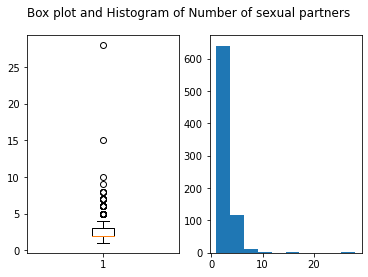

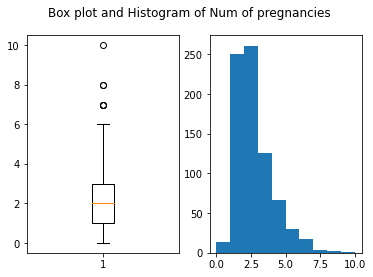

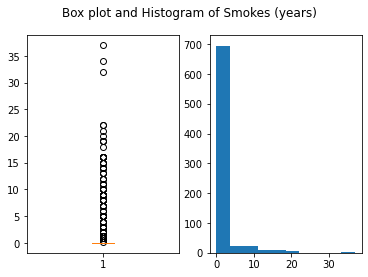

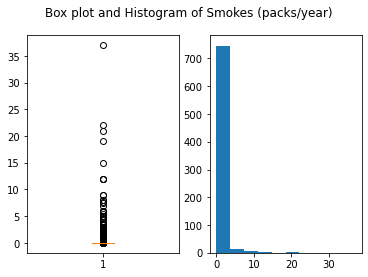

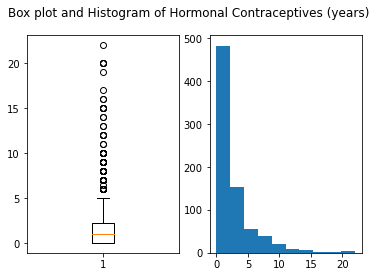

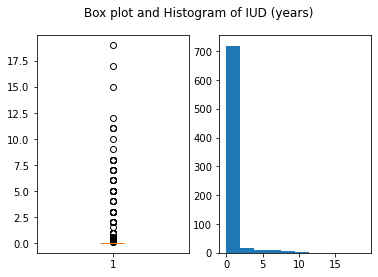

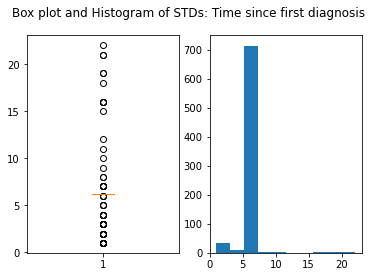

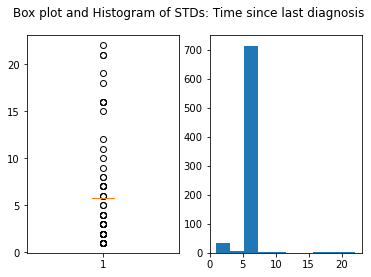

In [1136]:
column_train = [1,3,5,6,8,10,26,27]  # Index of identified columns
X_train_outlier = X_train_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_outlier.iloc[:,num:(num+1)])        # Histogram

From the data visualizations above, we can observe that all the graphs are skewed to the right. Therefore, we will be applying **Square Root transformation** to make the data more normally distributed and reduce the impact of outliers.

In [1137]:
# A copy of X_train_outlier where square root transformation will be applied
X_train_sqrt = X_train_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_train_sqrt.iloc[:,column] = np.sqrt(X_train_sqrt.iloc[:,column])
X_train_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,20.0,1.593805,16.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,1.000000,18.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.0,1.000000,16.0,1.000000,0.0,0.000000,0.0,0.642433,1.499536,0.106287,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,1.000000,17.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.0,1.414214,17.0,1.498497,1.0,3.162278,1.0,1.000000,1.732051,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,24.0,1.000000,14.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,27.0,1.414214,17.0,2.000000,0.0,0.000000,0.0,1.000000,1.414214,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,24.0,1.000000,17.0,1.732051,0.0,0.000000,0.0,1.000000,2.449490,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,20.0,1.000000,16.0,1.414214,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746803fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x25746810580>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746803cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25746810b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746810df0>],
 'means': []}

(array([424., 216., 110.,  14.,   5.,   1.,   1.,   0.,   0.,   1.]),
 array([1.        , 1.42915026, 1.85830052, 2.28745079, 2.71660105,
        3.14575131, 3.57490157, 4.00405184, 4.4332021 , 4.86235236,
        5.29150262]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x257468a4370>,
 'caps': [<matplotlib.lines.Line2D at 0x257468a4910>,
 'boxes': [<matplotlib.lines.Line2D at 0x257468a40a0>],
 'medians': [<matplotlib.lines.Line2D at 0x257468a4eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257468b11c0>],
 'means': []}

(array([ 14.,   0.,   0., 251., 261., 126.,  66.,  47.,   6.,   1.]),
 array([0.        , 0.31622777, 0.63245553, 0.9486833 , 1.26491106,
        1.58113883, 1.8973666 , 2.21359436, 2.52982213, 2.84604989,
        3.16227766]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257469357f0>,
 'caps': [<matplotlib.lines.Line2D at 0x25746935d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746935520>],
 'medians': [<matplotlib.lines.Line2D at 0x25746942370>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746942640>],
 'means': []}

(array([646.,  35.,  14.,  14.,  23.,  15.,  15.,   7.,   0.,   3.]),
 array([0.        , 0.60827625, 1.21655251, 1.82482876, 2.43310501,
        3.04138127, 3.64965752, 4.25793377, 4.86621002, 5.47448628,
        6.08276253]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257469cb940>,
 'caps': [<matplotlib.lines.Line2D at 0x257469cbee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257469cb670>],
 'medians': [<matplotlib.lines.Line2D at 0x257469dc4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257469dc790>],
 'means': []}

(array([665.,  55.,  23.,  12.,   9.,   3.,   1.,   3.,   0.,   1.]),
 array([0.        , 0.60827625, 1.21655251, 1.82482876, 2.43310501,
        3.04138127, 3.64965752, 4.25793377, 4.86621002, 5.47448628,
        6.08276253]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746a65bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x25746a76190>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746a658e0>],
 'medians': [<matplotlib.lines.Line2D at 0x25746a76730>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746a76a00>],
 'means': []}

(array([279.,  95.,  74., 168.,  50.,  44.,  38.,  10.,   8.,   6.]),
 array([0.        , 0.46904158, 0.93808315, 1.40712473, 1.8761663 ,
        2.34520788, 2.81424946, 3.28329103, 3.75233261, 4.22137418,
        4.69041576]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746b0e0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25746b0e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746afed90>],
 'medians': [<matplotlib.lines.Line2D at 0x25746b0ebe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746b0eeb0>],
 'means': []}

(array([601., 109.,   9.,  18.,   4.,  12.,  11.,   5.,   1.,   2.]),
 array([0.        , 0.43588989, 0.87177979, 1.30766968, 1.74355958,
        2.17944947, 2.61533937, 3.05122926, 3.48711915, 3.92300905,
        4.35889894]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since first diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746ba8520>,
 'caps': [<matplotlib.lines.Line2D at 0x25746ba8ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746ba8250>],
 'medians': [<matplotlib.lines.Line2D at 0x25746bb40a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746bb4370>],
 'means': []}

(array([ 15.,  18.,   5.,   6., 713.,   2.,   2.,   1.,   5.,   5.]),
 array([1.        , 1.36904158, 1.73808315, 2.10712473, 2.4761663 ,
        2.84520788, 3.21424946, 3.58329103, 3.95233261, 4.32137418,
        4.69041576]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of STDs: Time since last diagnosis')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746c3ca00>,
 'caps': [<matplotlib.lines.Line2D at 0x25746c3cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746c3c730>],
 'medians': [<matplotlib.lines.Line2D at 0x25746c4c580>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746c4c850>],
 'means': []}

(array([ 17.,  18.,   5., 711.,   7.,   2.,   2.,   1.,   5.,   4.]),
 array([1.        , 1.36904158, 1.73808315, 2.10712473, 2.4761663 ,
        2.84520788, 3.21424946, 3.58329103, 3.95233261, 4.32137418,
        4.69041576]),
 <BarContainer object of 10 artists>)

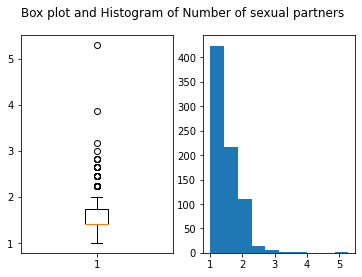

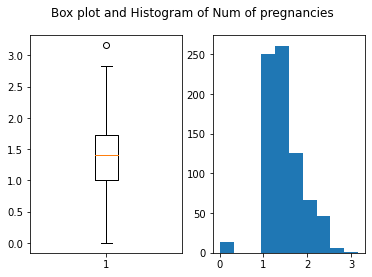

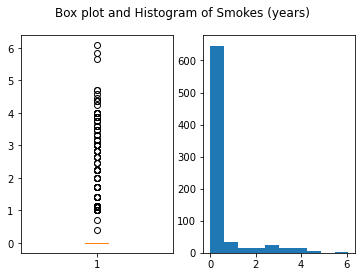

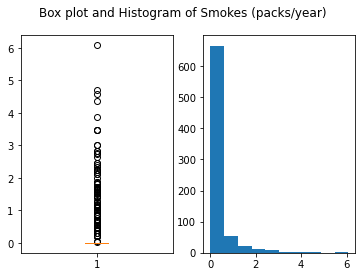

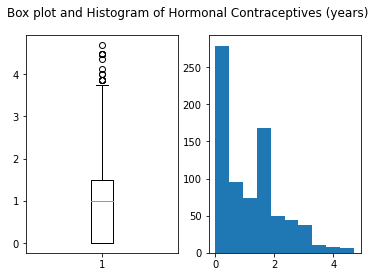

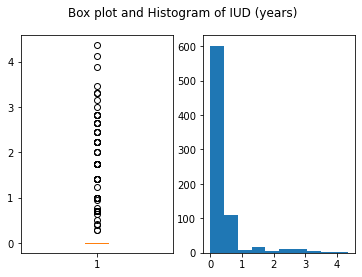

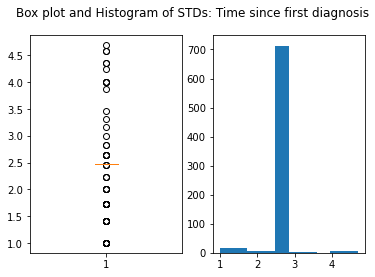

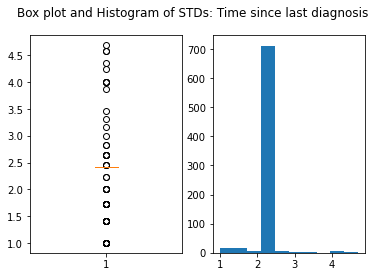

In [1138]:
# Plot the distribution of the transformed outlier columns
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_sqrt.iloc[:,num:(num+1)])        # Histogram


#### Validation Set

In [1139]:
X_vald_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.0,86.000000,86.000000
mean,27.279070,2.418605,17.279070,2.543210,0.094118,0.920788,0.208252,0.631579,2.325687,0.164384,0.703151,0.080000,0.160000,0.053333,0.0,0.0,0.053333,0.026667
std,10.031305,1.269230,2.523542,1.680682,0.291992,4.195289,1.021208,0.456124,4.368348,0.343467,1.779016,0.254836,0.553917,0.211066,0.0,0.0,0.211066,0.151334
min,13.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,21.000000,2.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,24.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,30.750000,3.000000,18.750000,3.000000,0.000000,0.000000,0.000000,1.000000,2.325687,0.164384,0.703151,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,84.000000,7.000000,27.000000,11.000000,1.000000,28.000000,7.000000,1.000000,30.000000,1.000000,8.000000,1.000000,3.000000,1.000000,0.0,0.0,1.000000,1.000000


In [1140]:
X_vald_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,86.0,86.0,86.0,86.0,86.000000,86.0,86.0,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.0,0.0,0.0,0.0,0.026667,0.0,0.0,0.05814,6.000000,6.000000,0.011628,0.011628,0.011628,0.023256,0.023256,0.069767,0.093023
std,0.0,0.0,0.0,0.0,0.151334,0.0,0.0,0.23538,0.766965,0.766965,0.107833,0.107833,0.107833,0.151599,0.151599,0.256249,0.292169
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.00000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The identified columns with outliers are:
- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)

From the plots below, we can see that the distributions of the columns stated above are skewed to the right, and outliers are indeed present.

Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746e72c10>,
 'caps': [<matplotlib.lines.Line2D at 0x25746e8a730>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746e7efa0>],
 'medians': [<matplotlib.lines.Line2D at 0x25746e8acd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746e8afa0>],
 'means': []}

(array([20., 34.,  0., 18.,  0.,  7.,  5.,  0.,  1.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746f1f310>,
 'caps': [<matplotlib.lines.Line2D at 0x25746f1f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746f12fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x25746f1fdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746f2d100>],
 'means': []}

(array([21., 30., 18.,  8.,  5.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746fb6760>,
 'caps': [<matplotlib.lines.Line2D at 0x25746fb6ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746fb6430>],
 'medians': [<matplotlib.lines.Line2D at 0x25746fbf1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746fbf490>],
 'means': []}

(array([81.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25747050640>,
 'caps': [<matplotlib.lines.Line2D at 0x25747050be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25747050370>],
 'medians': [<matplotlib.lines.Line2D at 0x2574705b1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2574705b490>],
 'means': []}

(array([82.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257470ea640>,
 'caps': [<matplotlib.lines.Line2D at 0x257470eabe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257470ea370>],
 'medians': [<matplotlib.lines.Line2D at 0x257470f51c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257470f5490>],
 'means': []}

(array([65., 13.,  3.,  2.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257471819d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25747181f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x257471816a0>],
 'medians': [<matplotlib.lines.Line2D at 0x257471914f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257471917c0>],
 'means': []}

(array([75.,  1.,  3.,  0.,  0.,  1.,  2.,  0.,  2.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

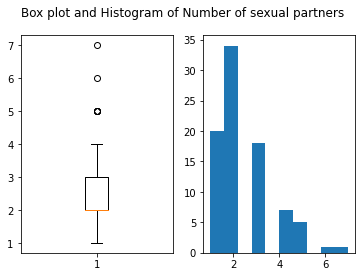

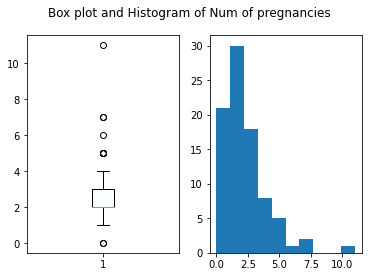

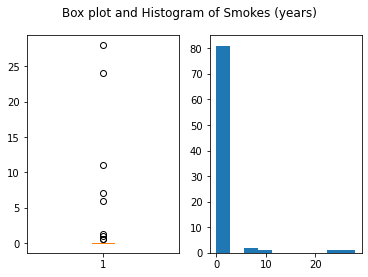

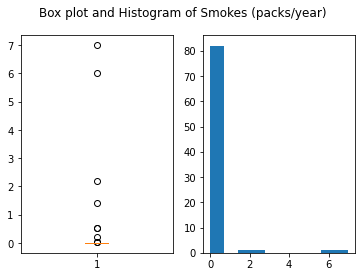

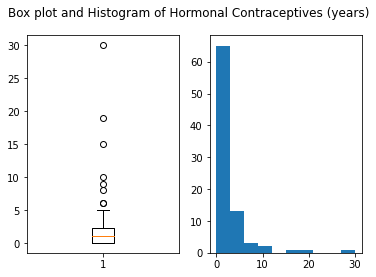

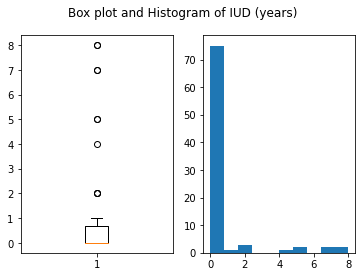

In [1141]:
column_vald = [1,3,5,6,8,10]  # Index of identified columns
X_vald_outlier = X_vald_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_vald:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_vald_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_vald_outlier.iloc[:,num:(num+1)])        # Histogram

In [1142]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_vald_sqrt = X_vald_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_vald_sqrt.iloc[:,column] = np.sqrt(X_vald_sqrt.iloc[:,column])
X_vald_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,30.0,1.414214,17.0,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.0,2.000000,16.0,1.732051,1.0,5.291503,2.645751,0.000000,0.000000,1.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,1.414214,14.0,2.645751,1.0,1.125599,0.716381,0.631579,1.525020,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,1.414214,19.0,2.236068,0.0,0.000000,0.000000,1.000000,5.477226,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,1.732051,22.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,24.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,40.0,1.000000,20.0,2.645751,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,45.0,1.414214,18.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,25.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x25747377040>,
 'caps': [<matplotlib.lines.Line2D at 0x25747377580>,
 'boxes': [<matplotlib.lines.Line2D at 0x25747368d00>],
 'medians': [<matplotlib.lines.Line2D at 0x25747377a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25747377d30>],
 'means': []}

(array([20.,  0., 34.,  0., 18.,  0.,  7.,  5.,  1.,  1.]),
 array([1.        , 1.16457513, 1.32915026, 1.49372539, 1.65830052,
        1.82287566, 1.98745079, 2.15202592, 2.31660105, 2.48117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x25747407340>,
 'caps': [<matplotlib.lines.Line2D at 0x257474078e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25747407070>],
 'medians': [<matplotlib.lines.Line2D at 0x25747407e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25747416190>],
 'means': []}

(array([ 2.,  0.,  0., 19., 35., 13., 13.,  3.,  0.,  1.]),
 array([0.        , 0.33166248, 0.66332496, 0.99498744, 1.32664992,
        1.6583124 , 1.98997487, 2.32163735, 2.65329983, 2.98496231,
        3.31662479]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2574749c850>,
 'caps': [<matplotlib.lines.Line2D at 0x2574749cdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2574749c580>],
 'medians': [<matplotlib.lines.Line2D at 0x257474ac3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257474ac6a0>],
 'means': []}

(array([77.,  3.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131, 3.17490157, 3.70405184, 4.2332021 , 4.76235236,
        5.29150262]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25747536a00>,
 'caps': [<matplotlib.lines.Line2D at 0x25747536fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25747536730>],
 'medians': [<matplotlib.lines.Line2D at 0x2574a1476a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2574a147850>],
 'means': []}

(array([79.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([0.        , 0.26457513, 0.52915026, 0.79372539, 1.05830052,
        1.32287566, 1.58745079, 1.85202592, 2.11660105, 2.38117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2574a1ceb50>,
 'caps': [<matplotlib.lines.Line2D at 0x2574a1e2130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2574a1ce880>],
 'medians': [<matplotlib.lines.Line2D at 0x2574a1e26d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2574a1e29a0>],
 'means': []}

(array([36., 12., 17., 10.,  5.,  3.,  0.,  2.,  0.,  1.]),
 array([0.        , 0.54772256, 1.09544512, 1.64316767, 2.19089023,
        2.73861279, 3.28633535, 3.8340579 , 4.38178046, 4.92950302,
        5.47722558]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2574a269fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2574a2794f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2574a269c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2574a279a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2574a279d60>],
 'means': []}

(array([61.,  0., 14.,  1.,  0.,  3.,  0.,  3.,  0.,  4.]),
 array([0.        , 0.28284271, 0.56568542, 0.84852814, 1.13137085,
        1.41421356, 1.69705627, 1.97989899, 2.2627417 , 2.54558441,
        2.82842712]),
 <BarContainer object of 10 artists>)

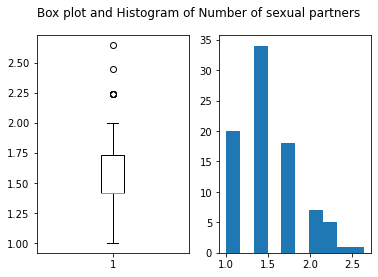

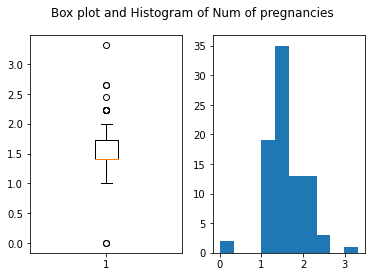

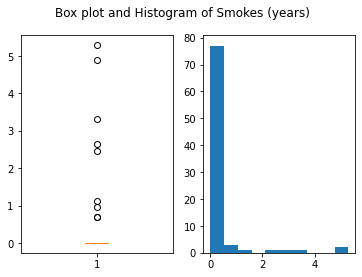

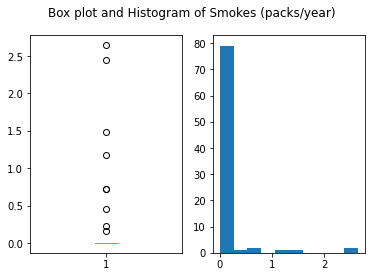

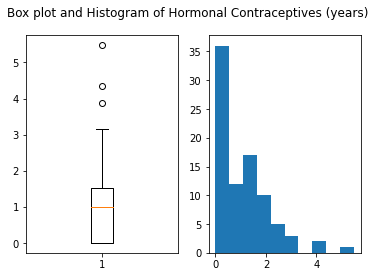

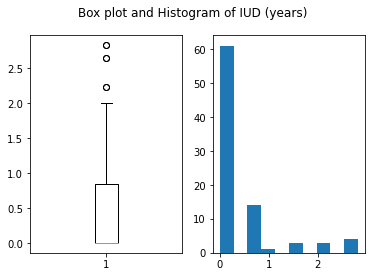

In [1143]:
# Plot the distribution of the transformed outlier columns
for num in column_vald:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_vald_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_vald_sqrt.iloc[:,num:(num+1)])        # Histogram


#### Test Set

In [1144]:
X_test_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.0,86.000000,86.000000
mean,27.279070,2.418605,17.279070,2.543210,0.094118,0.920788,0.208252,0.631579,2.325687,0.164384,0.703151,0.080000,0.160000,0.053333,0.0,0.0,0.053333,0.026667
std,10.031305,1.269230,2.523542,1.680682,0.291992,4.195289,1.021208,0.456124,4.368348,0.343467,1.779016,0.254836,0.553917,0.211066,0.0,0.0,0.211066,0.151334
min,13.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,21.000000,2.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,24.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,30.750000,3.000000,18.750000,3.000000,0.000000,0.000000,0.000000,1.000000,2.325687,0.164384,0.703151,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,84.000000,7.000000,27.000000,11.000000,1.000000,28.000000,7.000000,1.000000,30.000000,1.000000,8.000000,1.000000,3.000000,1.000000,0.0,0.0,1.000000,1.000000


In [1145]:
X_test_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,86.0,86.0,86.0,86.0,86.000000,86.0,86.0,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.0,0.0,0.0,0.0,0.026667,0.0,0.0,0.05814,6.000000,6.000000,0.011628,0.011628,0.011628,0.023256,0.023256,0.069767,0.093023
std,0.0,0.0,0.0,0.0,0.151334,0.0,0.0,0.23538,0.766965,0.766965,0.107833,0.107833,0.107833,0.151599,0.151599,0.256249,0.292169
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.00000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The identified columns with outliers are similar with those of the validation set, which are:
- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)

From the plots below, we can see that the distributions of the columns stated above are skewed to the right, and outliers are indeed present.

Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x257472323d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25747232760>,
 'boxes': [<matplotlib.lines.Line2D at 0x257472244f0>],
 'medians': [<matplotlib.lines.Line2D at 0x25747232be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257472327c0>],
 'means': []}

(array([20., 34.,  0., 18.,  0.,  7.,  5.,  0.,  1.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746e1d280>,
 'caps': [<matplotlib.lines.Line2D at 0x25746e1dac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746e1d3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x25746e05070>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746e27730>],
 'means': []}

(array([21., 30., 18.,  8.,  5.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746b3b670>,
 'caps': [<matplotlib.lines.Line2D at 0x25746b33160>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746b3b460>],
 'medians': [<matplotlib.lines.Line2D at 0x25746b33220>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746b33850>],
 'means': []}

(array([81.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746d28be0>,
 'caps': [<matplotlib.lines.Line2D at 0x25746d3a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x25746d28910>],
 'medians': [<matplotlib.lines.Line2D at 0x25746d3a400>],
 'fliers': [<matplotlib.lines.Line2D at 0x25746d3af70>],
 'means': []}

(array([82.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x257467443a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25746744b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2574654c070>],
 'medians': [<matplotlib.lines.Line2D at 0x257467449a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257467442e0>],
 'means': []}

(array([65., 13.,  3.,  2.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25746728d00>,
 'caps': [<matplotlib.lines.Line2D at 0x257467282e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257467285e0>],
 'medians': [<matplotlib.lines.Line2D at 0x257466df8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x257466df100>],
 'means': []}

(array([75.,  1.,  3.,  0.,  0.,  1.,  2.,  0.,  2.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

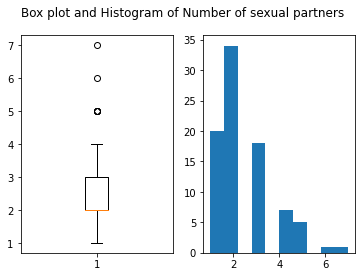

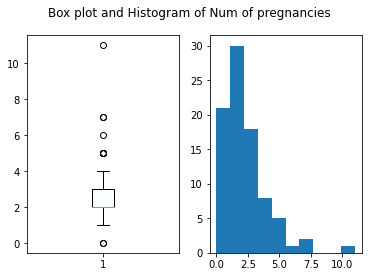

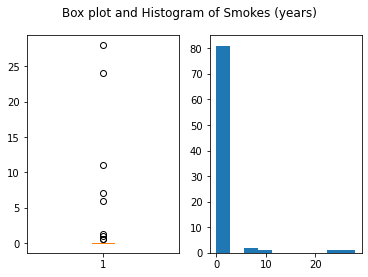

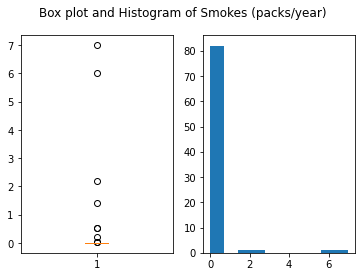

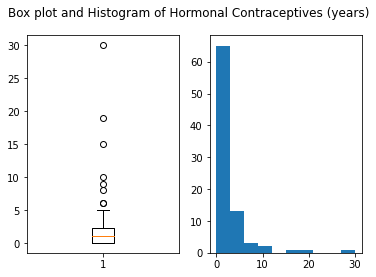

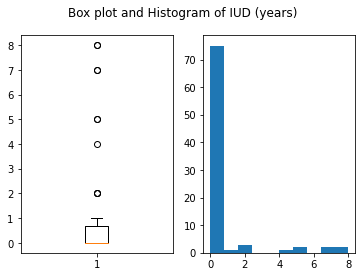

In [1146]:
column_test = [1,3,5,6,8,10]  # Index of identified columns
X_test_outlier = X_test_imputed.copy()

# Plot the distribution of the outlier columns
for num in column_test:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_test_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_test_outlier.iloc[:,num:(num+1)])        # Histogram

In [1147]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_test_sqrt = X_test_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_test_sqrt.iloc[:,column] = np.sqrt(X_test_sqrt.iloc[:,column])
X_test_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,30.0,1.414214,17.0,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.0,2.000000,16.0,1.732051,1.0,5.291503,2.645751,0.000000,0.000000,1.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,1.414214,14.0,2.645751,1.0,1.125599,0.716381,0.631579,1.525020,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,1.414214,19.0,2.236068,0.0,0.000000,0.000000,1.000000,5.477226,0.164384,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,1.732051,22.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,24.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,40.0,1.000000,20.0,2.645751,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,45.0,1.414214,18.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,25.0,1.732051,17.0,1.732051,0.0,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.0,2.44949,2.44949,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0.98, 'Box plot and Histogram of Number of sexual partners')

{'whiskers': [<matplotlib.lines.Line2D at 0x2573fc15790>,
 'caps': [<matplotlib.lines.Line2D at 0x2573fc155e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2573fc157c0>],
 'medians': [<matplotlib.lines.Line2D at 0x25740f66490>],
 'fliers': [<matplotlib.lines.Line2D at 0x25740f66730>],
 'means': []}

(array([20.,  0., 34.,  0., 18.,  0.,  7.,  5.,  1.,  1.]),
 array([1.        , 1.16457513, 1.32915026, 1.49372539, 1.65830052,
        1.82287566, 1.98745079, 2.15202592, 2.31660105, 2.48117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Num of pregnancies')

{'whiskers': [<matplotlib.lines.Line2D at 0x2573f5b0820>,
 'caps': [<matplotlib.lines.Line2D at 0x2573f5b0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2573e4b2bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2573f5b0df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2573f5b0ca0>],
 'means': []}

(array([ 2.,  0.,  0., 19., 35., 13., 13.,  3.,  0.,  1.]),
 array([0.        , 0.33166248, 0.66332496, 0.99498744, 1.32664992,
        1.6583124 , 1.98997487, 2.32163735, 2.65329983, 2.98496231,
        3.31662479]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2573f3d4970>,
 'caps': [<matplotlib.lines.Line2D at 0x2573f3d43a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25741565730>],
 'medians': [<matplotlib.lines.Line2D at 0x2573f3d4d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2573f3d40a0>],
 'means': []}

(array([77.,  3.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131, 3.17490157, 3.70405184, 4.2332021 , 4.76235236,
        5.29150262]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Smokes (packs/year)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25739583e50>,
 'caps': [<matplotlib.lines.Line2D at 0x25739583ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25739583cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25739595550>],
 'fliers': [<matplotlib.lines.Line2D at 0x257395953a0>],
 'means': []}

(array([79.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([0.        , 0.26457513, 0.52915026, 0.79372539, 1.05830052,
        1.32287566, 1.58745079, 1.85202592, 2.11660105, 2.38117618,
        2.64575131]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of Hormonal Contraceptives (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x2573f93e670>,
 'caps': [<matplotlib.lines.Line2D at 0x2573f93ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2573f93e1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2573f9271f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2573f927490>],
 'means': []}

(array([36., 12., 17., 10.,  5.,  3.,  0.,  2.,  0.,  1.]),
 array([0.        , 0.54772256, 1.09544512, 1.64316767, 2.19089023,
        2.73861279, 3.28633535, 3.8340579 , 4.38178046, 4.92950302,
        5.47722558]),
 <BarContainer object of 10 artists>)

Text(0.5, 0.98, 'Box plot and Histogram of IUD (years)')

{'whiskers': [<matplotlib.lines.Line2D at 0x25740d92d30>,
 'caps': [<matplotlib.lines.Line2D at 0x25740f03280>,
 'boxes': [<matplotlib.lines.Line2D at 0x25740d92fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25740f03d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x25740f03eb0>],
 'means': []}

(array([61.,  0., 14.,  1.,  0.,  3.,  0.,  3.,  0.,  4.]),
 array([0.        , 0.28284271, 0.56568542, 0.84852814, 1.13137085,
        1.41421356, 1.69705627, 1.97989899, 2.2627417 , 2.54558441,
        2.82842712]),
 <BarContainer object of 10 artists>)

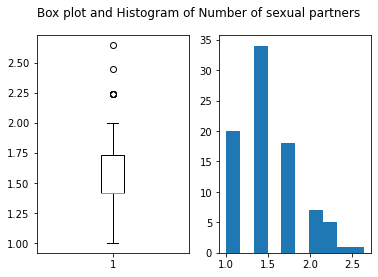

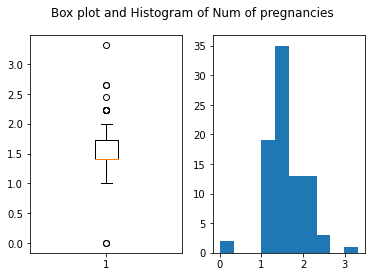

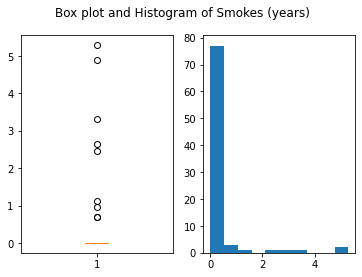

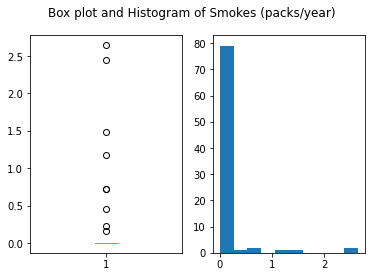

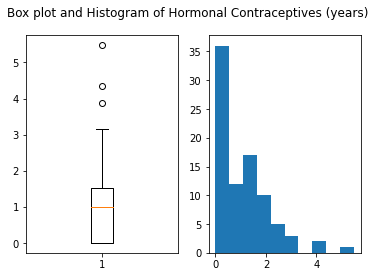

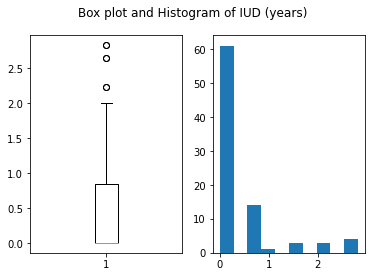

In [1148]:
# Plot the distribution of the transformed outlier columns
for num in column_test:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_test_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_test_sqrt.iloc[:,num:(num+1)])        # Histogram


### Imbalanced Data

#### Training Set

In [1149]:
# Display the number of values for each class in y
y_train.value_counts()

0    722
1     50
Name: Biopsy, dtype: int64

c:\Users\looiw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '722'), Text(0, 0, '50')]

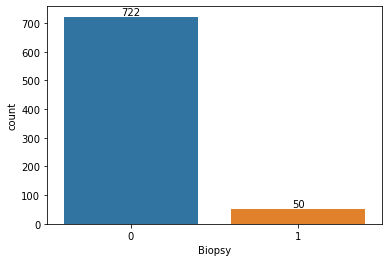

In [1150]:
# Plot the graph to visualize the imbalance of the target column
y_train_countplot = sns.countplot(y_train)

for container in y_train_countplot.containers:
    y_train_countplot.bar_label(container)

As we observe from the numbers and graph above, we can see that there is an extreme uneven distribution of values for class 0 and 1. The majority class is 94%（722 out of 772 records) with a negative biopsy diagnosis, while the minority class is only 6% (50 out of 772 records) with a positive biopsy diagnosis. This may cause a biased prediction by our classification models.

Thus, we will deal with this imbalance by oversampling the minority class by resampling, using the resample() function from the sklearn.utils library.

In [1151]:
# Reset index for y_train to concatenate with X_train_sqrt
y_train_reset_index = (y_train.reset_index()).drop('index', axis = 1)
y_train_reset_index

,Biopsy
0,0
1,0
2,0
3,0
4,0
...,...
767,0
768,0
769,0
770,0


In [1152]:
# Combining X_train and y_train into a dataframe for easy operation
train = pd.concat([X_train_sqrt, y_train_reset_index], axis = 1)
train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,20.0,1.593805,16.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,20.0,1.000000,18.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,17.0,1.000000,16.0,1.000000,0.0,0.000000,0.0,0.642433,1.499536,0.106287,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,18.0,1.000000,17.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,26.0,1.414214,17.0,1.498497,1.0,3.162278,1.0,1.000000,1.732051,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,24.0,1.000000,14.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
768,27.0,1.414214,17.0,2.000000,0.0,0.000000,0.0,1.000000,1.414214,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
769,24.0,1.000000,17.0,1.732051,0.0,0.000000,0.0,1.000000,2.449490,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
770,20.0,1.000000,16.0,1.414214,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.480225,2.408948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [1153]:
# Create two different dataframe for class 0 and 1
train_major = train[(train['Biopsy']==0)]  # class 0 is the majority class
train_minor = train[(train['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 722
train_minor_upsampled = resample(train_minor, replace=True, n_samples = 722, random_state = 42)

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_minor_upsampled, train_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
train_upsampled = shuffle(train_upsampled)

train_upsampled['Biopsy']

237    1
136    1
658    1
703    0
353    1
      ..
134    0
214    0
493    1
139    1
592    1
Name: Biopsy, Length: 1444, dtype: int64

In [1154]:
# Check if the value for each class is balanced
train_upsampled['Biopsy'].value_counts()

1    722
0    722
Name: Biopsy, dtype: int64

[Text(0, 0, '722'), Text(0, 0, '722')]

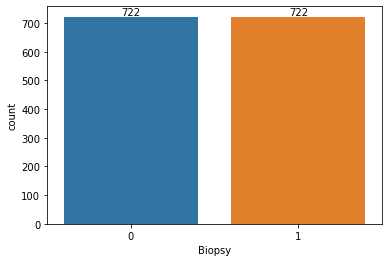

In [1155]:
# Visualise the balanced data
y_train_countplot = sns.countplot(data = train_upsampled, x = 'Biopsy')

for container in y_train_countplot.containers:
    y_train_countplot.bar_label(container)

As shown above, the class distribution is now balanced, with 722 records respectively for both class 0 and class 1.

In [1156]:
train_upsampled.shape

(1444, 36)

In [1157]:
# Split the dataframe back into feature columns and target column
X_train_balanced = train_upsampled.drop('Biopsy', axis = 1)
y_train_balanced = train_upsampled['Biopsy']

In [1158]:
X_train_balanced.shape

(1444, 35)

In [1159]:
y_train_balanced.shape

(1444,)

Repeat the steps separately for validation set and test set.

#### Validation Set

In [1160]:
# Display the number of values for each class in y
y_vald.value_counts()

0    81
1     5
Name: Biopsy, dtype: int64

In [1161]:
# Reset index for y_vald to concatenate with X_vald_sqrt
y_vald_reset_index = (y_vald.reset_index()).drop('index', axis = 1)

# Combining X_train and y_train into a dataframe for easy operation
vald = pd.concat([X_vald_sqrt, y_vald_reset_index], axis = 1)

# Create two different dataframe for class 0 and 1
vald_major = vald[(vald['Biopsy']==0)]  # class 0 is the majority class
vald_minor = vald[(vald['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 81
vald_minor_upsampled = resample(vald_minor, replace=True, n_samples = 81, random_state = 42)

# Combine majority class with upsampled minority class
vald_upsampled = pd.concat([vald_minor_upsampled, vald_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
vald_upsampled = shuffle(vald_upsampled)

vald_upsampled['Biopsy']

48    0
85    0
19    0
14    0
45    1
     ..
60    0
77    0
84    0
80    1
58    1
Name: Biopsy, Length: 162, dtype: int64

In [1162]:
# Check if the value for each class is balanced
vald_upsampled['Biopsy'].value_counts()

0    81
1    81
Name: Biopsy, dtype: int64

[Text(0, 0, '81'), Text(0, 0, '81')]

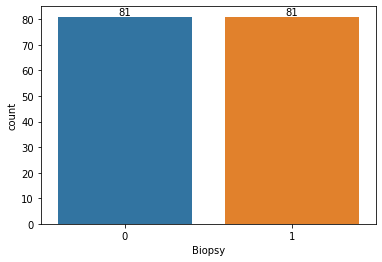

In [1163]:
# Visualise the balanced data
y_vald_countplot = sns.countplot(data = vald_upsampled, x = "Biopsy")

for container in y_vald_countplot.containers:
    y_vald_countplot.bar_label(container)


In [1164]:
vald_upsampled.shape

(162, 36)

In [1165]:
# Split the dataframe back into feature columns and target column
X_vald_balanced = vald_upsampled.drop('Biopsy', axis = 1)
y_vald_balanced = vald_upsampled['Biopsy']

In [1166]:
X_vald_balanced.shape

(162, 35)

In [1167]:
y_vald_balanced.shape

(162,)

#### Test Set

In [1168]:
# Display the number of values for each class in y
y_test.value_counts()

0    81
1     5
Name: Biopsy, dtype: int64

In [1169]:
# Reset index for y_test to concatenate with X_test_sqrt
y_test_reset_index = (y_test.reset_index()).drop('index', axis = 1)

# Combining X_train and y_train into a dataframe for easy operation
test = pd.concat([X_test_sqrt, y_test_reset_index], axis = 1)

# Create two different dataframe for class 0 and 1
test_major = test[(test['Biopsy']==0)]  # class 0 is the majority class
test_minor = test[(test['Biopsy']==1)]  # class 1 is the minority class

# Oversample the minority class with the number of majority class = 81
test_minor_upsampled = resample(test_minor, replace=True, n_samples = 81, random_state = 42)

# Combine majority class with upsampled minority class
test_upsampled = pd.concat([test_minor_upsampled, test_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together
test_upsampled = shuffle(test_upsampled)

test_upsampled['Biopsy']

61    1
58    1
45    1
40    0
55    0
     ..
45    1
80    1
61    1
61    1
61    1
Name: Biopsy, Length: 162, dtype: int64

In [1170]:
# Check if the value for each class is balanced
test_upsampled['Biopsy'].value_counts()

1    81
0    81
Name: Biopsy, dtype: int64

[Text(0, 0, '81'), Text(0, 0, '81')]

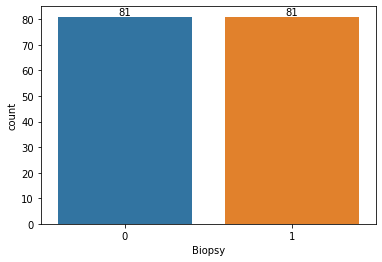

In [1171]:
# Visualise the balanced data
y_test_countplot = sns.countplot(data = test_upsampled, x = "Biopsy")

for container in y_test_countplot.containers:
    y_test_countplot.bar_label(container)

In [1172]:
test_upsampled.shape

(162, 36)

In [1173]:
# Split the dataframe back into feature columns and target column
X_test_balanced = test_upsampled.drop('Biopsy', axis = 1)
y_test_balanced = test_upsampled['Biopsy']

In [1174]:
X_test_balanced.shape

(162, 35)

In [1175]:
y_test_balanced.shape

(162,)

### Data Normalization

In [1176]:
columns_need_norm = [] # Columns in the dataframe that needs to be normalized

# Function for Normalisation using MinMaxScaler
def Norm_MinMaxScaler(df):
    for num in columns_need_norm:
        df_copy = df
        scaler = MinMaxScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [1177]:
X_train_sqrt.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,26.769430,1.534234,16.963399,1.428461,0.151316,0.405526,0.223127,0.642433,1.075401,0.106287,...,0.090674,2.457574,2.386027,0.022021,0.010363,0.022021,0.028497,0.042746,0.088083,0.046632
std,8.315672,0.431950,2.819925,0.453053,0.355791,1.044086,0.656739,0.448121,1.045723,0.286880,...,0.309078,0.334649,0.331734,0.146846,0.101334,0.146846,0.166497,0.202415,0.283599,0.210986
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.500000,1.414214,17.000000,1.414214,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.499536,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,5.291503,32.000000,3.162278,1.000000,6.082763,6.082763,1.000000,4.690416,1.000000,...,3.000000,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1178]:
X_train_balanced.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,...,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000
mean,27.977839,1.520412,17.103701,1.479170,0.156737,0.457211,0.246084,0.666176,1.185268,0.148779,...,0.128116,2.445337,2.379592,0.067175,0.027008,0.067175,0.071330,0.268698,0.472299,0.150970
std,8.796510,0.405490,2.780299,0.421135,0.360977,1.157133,0.682612,0.454905,1.233222,0.341940,...,0.344543,0.399860,0.395434,0.250411,0.162164,0.250411,0.257464,0.443436,0.499405,0.358143
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.414214,17.000000,1.414214,0.000000,0.000000,0.000000,1.000000,0.761577,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.000000,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.000000,2.480225,2.408948,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,79.000000,5.291503,32.000000,3.162278,1.000000,6.082763,6.082763,1.000000,4.690416,1.000000,...,3.000000,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the max values of each column, we can see that the following columns from both balanced data and imbalanced data needs to be normalised:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis


Imbalanced Data

In [1179]:
# Columns identified that needs normalization
columns_need_norm = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_norm = Norm_MinMaxScaler(X_train_sqrt)
X_vald_norm = Norm_MinMaxScaler(X_vald_sqrt)
X_test_norm = Norm_MinMaxScaler(X_test_sqrt)

In [1180]:
X_train_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.092308,0.138368,0.272727,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.092308,0.000000,0.363636,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046154,0.000000,0.272727,0.316228,0.0,0.000000,0.000000,0.642433,0.319702,0.106287,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.061538,0.000000,0.318182,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.184615,0.096519,0.318182,0.473866,1.0,0.519875,0.164399,1.000000,0.369274,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.153846,0.000000,0.181818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,0.200000,0.096519,0.318182,0.632456,0.0,0.000000,0.000000,1.000000,0.301511,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,0.153846,0.000000,0.318182,0.547723,0.0,0.000000,0.000000,1.000000,0.522233,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,0.092308,0.000000,0.272727,0.447214,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1181]:
X_vald_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.239437,0.251687,0.285714,0.301511,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.422535,0.607625,0.214286,0.522233,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.140845,0.251687,0.071429,0.797724,1.0,0.212718,0.270767,0.631579,0.278429,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352113,0.251687,0.428571,0.674200,0.0,0.000000,0.000000,1.000000,1.000000,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.239437,0.444813,0.642857,0.301511,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.154930,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.380282,0.000000,0.500000,0.797724,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.450704,0.251687,0.357143,0.603023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,0.169014,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.316228,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1182]:
X_test_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.239437,0.251687,0.285714,0.301511,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.422535,0.607625,0.214286,0.522233,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.140845,0.251687,0.071429,0.797724,1.0,0.212718,0.270767,0.631579,0.278429,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352113,0.251687,0.428571,0.674200,0.0,0.000000,0.000000,1.000000,1.000000,0.164384,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.239437,0.444813,0.642857,0.301511,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.154930,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.380282,0.000000,0.500000,0.797724,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.450704,0.251687,0.357143,0.603023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,0.169014,0.444813,0.285714,0.522233,0.0,0.000000,0.000000,1.000000,0.316228,0.000000,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Balanced Data

In [1183]:
# Columns identified that needs normalization
columns_need_norm = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_norm_balanced = Norm_MinMaxScaler(X_train_balanced)
X_vald_norm_balanced = Norm_MinMaxScaler(X_vald_balanced)
X_test_norm_balanced = Norm_MinMaxScaler(X_test_balanced)

In [1184]:
X_train_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
237,0.076923,0.000000,0.363636,0.316228,0.0,0.0,0.0,1.0,0.213201,0.0,...,0.0,0.4011,0.381786,1.0,0.0,1.0,1.0,1.0,1.0,1.0
136,0.200000,0.000000,0.363636,0.547723,0.0,0.0,0.0,1.0,0.150756,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,1.0,1.0,0.0
658,0.107692,0.233019,0.227273,0.316228,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,1.0,1.0
703,0.046154,0.000000,0.272727,0.473866,0.0,0.0,0.0,1.0,0.106600,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.107692,0.000000,0.318182,0.473866,0.0,0.0,0.0,1.0,0.369274,0.0,...,0.0,0.4011,0.381786,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.061538,0.000000,0.227273,0.316228,0.0,0.0,0.0,1.0,0.122474,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.246154,0.170581,0.181818,0.547723,0.0,0.0,0.0,1.0,0.301511,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.292308,0.000000,0.863636,0.447214,0.0,0.0,0.0,1.0,0.150756,0.0,...,0.0,0.4011,0.381786,0.0,0.0,0.0,0.0,0.0,1.0,1.0
139,0.369231,0.096519,0.227273,0.632456,0.0,0.0,0.0,1.0,0.852803,0.0,...,0.0,0.4011,0.381786,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [1185]:
X_vald_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
48,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.042254,0.000000,0.071429,0.301511,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.183099,0.000000,0.428571,0.522233,0.0,0.0,0.0,1.0,0.182574,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.140845,0.751066,0.214286,0.301511,0.0,0.0,0.0,1.0,0.091287,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.112676,0.444813,0.285714,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.070423,0.444813,0.071429,0.426401,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,1.0
77,0.140845,0.000000,0.285714,0.426401,0.0,0.0,0.0,1.0,0.129099,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,1.0,1.0,0.0
84,0.169014,0.444813,0.285714,0.522233,0.0,0.0,0.0,1.0,0.316228,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.211268,0.751066,0.142857,0.603023,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [1186]:
X_test_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
61,0.169014,0.880747,0.285714,0.426401,0.0,0.0,0.0,1.0,0.258199,0.0,...,1.0,0.307918,0.307918,0.0,0.0,0.0,0.0,0.0,1.0,1.0
58,0.352113,0.444813,0.357143,0.603023,0.0,0.0,0.0,1.0,0.577350,1.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,0.112676,0.444813,0.285714,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,1.0,0.0,1.0,0.0,0.0,0.0
40,0.267606,0.251687,0.571429,0.426401,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.183099,0.251687,0.357143,0.301511,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.112676,0.444813,0.285714,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,1.0,0.0,1.0,0.0,0.0,0.0
80,0.211268,0.751066,0.142857,0.603023,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.544192,0.544192,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,0.169014,0.880747,0.285714,0.426401,0.0,0.0,0.0,1.0,0.258199,0.0,...,1.0,0.307918,0.307918,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,0.169014,0.880747,0.285714,0.426401,0.0,0.0,0.0,1.0,0.258199,0.0,...,1.0,0.307918,0.307918,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Data Standardization 

In [1187]:
columns_need_std = [] # Columns in the dataframe that needs to be standardized

# Function for Normalisation using MinMaxScaler
def Std_StandardScaler(df):
    for num in columns_need_norm:
        df_copy = df
        scaler = StandardScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [1188]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

We want to standardize only numeric data and not categorical data, therefore only the following columns are chosen, similar to those that are normalized:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

Imbalanced Data

In [1189]:
# Columns identified that needs normalization
columns_need_std = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_std = Std_StandardScaler(X_train_norm)
X_vald_std = Std_StandardScaler(X_vald_norm)
X_test_std = Std_StandardScaler(X_test_norm)

In [1190]:
X_train_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-0.814585,0.138000,-0.341861,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.814585,-1.237598,0.367837,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,2.943972,-4.358360,-4.180839,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.175583,-1.237598,-0.341861,-0.946334,0.0,-0.388654,-0.339970,0.642433,0.405853,0.106287,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.055250,-1.237598,0.012988,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.092588,-0.278038,0.012988,0.154686,1.0,2.642061,1.183692,1.000000,0.628345,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-0.333253,-1.237598,-1.051560,-3.155014,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,0.027745,-0.278038,0.012988,1.262346,0.0,-0.388654,-0.339970,1.000000,0.324208,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,-0.333253,-1.237598,0.012988,0.670532,0.0,-0.388654,-0.339970,1.000000,1.314860,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,-0.814585,-1.237598,-0.341861,-0.031469,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-0.293558,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1191]:
X_vald_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.272835,-0.237682,-0.111235,-1.021258,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.576379,1.275434,-0.509828,0.434864,1.0,5.445524,5.732522,0.000000,-0.974270,1.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.429073,-0.237682,-1.307013,2.252304,1.0,0.939515,1.359353,0.631579,0.421868,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.075016,-0.237682,0.685950,1.437404,0.0,-0.277978,-0.264419,1.000000,4.040066,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.272835,0.583307,1.881728,-1.021258,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.328801,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,1.275561,-1.307617,1.084543,2.252304,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,1.776924,-0.237682,0.287357,0.967841,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,-0.228528,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,0.611402,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1192]:
X_test_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.272835,-0.237682,-0.111235,-1.021258,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.576379,1.275434,-0.509828,0.434864,1.0,5.445524,5.732522,0.000000,-0.974270,1.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.429073,-0.237682,-1.307013,2.252304,1.0,0.939515,1.359353,0.631579,0.421868,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.075016,-0.237682,0.685950,1.437404,0.0,-0.277978,-0.264419,1.000000,4.040066,0.164384,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.272835,0.583307,1.881728,-1.021258,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.328801,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,-0.058782,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,1.275561,-1.307617,1.084543,2.252304,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,1.776924,-0.237682,0.287357,0.967841,0.0,-0.277978,-0.264419,0.000000,-0.974270,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,-0.228528,0.583307,-0.111235,0.434864,0.0,-0.277978,-0.264419,1.000000,0.611402,0.000000,...,-0.248452,0.032776,0.032776,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Balanced Data

In [1193]:
# Columns identified that needs normalization
columns_need_std = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_std_balanced = Std_StandardScaler(X_train_norm_balanced)
X_vald_std_balanced = Std_StandardScaler(X_vald_norm_balanced)
X_test_std_balanced = Std_StandardScaler(X_test_norm_balanced)

In [1194]:
X_train_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
237,-1.020967,-1.283857,0.322487,-1.138202,0.0,-0.395261,-0.360629,1.0,-0.150283,0.0,...,-0.371973,0.087281,0.074263,1.0,0.0,1.0,1.0,1.0,1.0,1.0
136,-0.111201,-1.283857,0.322487,0.600682,0.0,-0.395261,-0.360629,1.0,-0.387868,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,1.0,1.0,0.0
658,-0.793526,1.183146,-0.756908,-1.138202,0.0,-0.395261,-0.360629,0.0,-0.961448,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,1.0,1.0
703,-1.248409,-1.283857,-0.397109,0.045907,0.0,-0.395261,-0.360629,1.0,-0.555865,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,-0.793526,-1.283857,-0.037311,0.045907,0.0,-0.395261,-0.360629,1.0,0.443531,0.0,...,-0.371973,0.087281,0.074263,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-1.134688,-1.283857,-0.756908,-1.138202,0.0,-0.395261,-0.360629,1.0,-0.495469,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.229962,0.522114,-1.116706,0.600682,0.0,-0.395261,-0.360629,1.0,0.185713,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.571124,-1.283857,4.280266,-0.154296,0.0,-0.395261,-0.360629,1.0,-0.387868,0.0,...,-0.371973,0.087281,0.074263,0.0,0.0,0.0,0.0,0.0,1.0,1.0
139,1.139729,-0.261991,-0.756908,1.237158,0.0,-0.395261,-0.360629,1.0,2.283212,0.0,...,-0.371973,0.087281,0.074263,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [1195]:
X_vald_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
48,-1.651074,-1.688572,-2.060775,-2.175077,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,-1.286005,-1.688572,-1.548742,-0.621614,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,-0.069108,-1.688572,1.011423,0.515601,0.0,-0.198962,-0.189573,1.0,0.002367,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,-0.434177,1.039331,-0.524676,-0.621614,0.0,-0.198962,-0.189573,1.0,-0.460438,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,-0.677556,-0.072994,-0.012643,-2.175077,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-1.042625,-0.072994,-1.548742,0.021852,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,1.0
77,-0.434177,-1.688572,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.0,-0.268738,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,1.0,1.0,0.0
84,-0.190797,-0.072994,-0.012643,0.515601,0.0,-0.198962,-0.189573,1.0,0.679959,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.174272,1.039331,-1.036709,0.931850,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [1196]:
X_test_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
61,-0.190797,1.510336,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.0,0.385766,0.0,...,2.141543,-1.929944,-1.929944,0.0,0.0,0.0,0.0,0.0,1.0,1.0
58,1.391168,-0.072994,0.499390,0.931850,0.0,-0.198962,-0.189573,1.0,2.003789,1.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45,-0.677556,-0.072994,-0.012643,-2.175077,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,1.0,0.0,1.0,0.0,0.0,0.0
40,0.661030,-0.774436,2.035489,0.021852,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,-0.069108,-0.774436,0.499390,-0.621614,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,-0.677556,-0.072994,-0.012643,-2.175077,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,1.0,0.0,1.0,0.0,0.0,0.0
80,0.174272,1.039331,-1.036709,0.931850,0.0,-0.198962,-0.189573,0.0,-0.923242,0.0,...,-0.466953,0.352277,0.352277,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,-0.190797,1.510336,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.0,0.385766,0.0,...,2.141543,-1.929944,-1.929944,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,-0.190797,1.510336,-0.012643,0.021852,0.0,-0.198962,-0.189573,1.0,0.385766,0.0,...,2.141543,-1.929944,-1.929944,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

Feature selection is done to select the features that most correlated with our target feature. 
So that we can :

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

- Improves Accuracy: Less misleading data means modeling accuracy improves.

- Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

We will be conducting the feaature selection by 
1. Building a Correlation Matrix Heatmap (using Pearson Correlation Coefficient)
2. Identifying the features with correlation coefficient closer to 0 (weaker correlation)
3. Drop the columns with weak correlation

At the end of this Feature Selection Section,

Imbalanced data will be represented by:
- X_train
- X_vald
- X_test
- y_train
- y_vald
- y_test

Balanced data will be represented by:
- X_train_balanced
- X_vald_balanced
- X_test_balanced
- y_train_balanced
- y_vald_balanced
- y_test_balanced

##### 1. Correlation Matrix Heatmap

In [1197]:
# Concatenate X_train_std and y_train
train_corr = pd.concat([X_train_std, y_train_reset_index], axis = 1)
train_corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,-0.814585,0.138000,-0.341861,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.814585,-1.237598,0.367837,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,-4.358360,-4.180839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.175583,-1.237598,-0.341861,-0.946334,0.0,-0.388654,-0.339970,0.642433,0.405853,0.106287,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.055250,-1.237598,0.012988,-0.946334,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.092588,-0.278038,0.012988,0.154686,1.0,2.642061,1.183692,1.000000,0.628345,0.000000,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-0.333253,-1.237598,-1.051560,-3.155014,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
768,0.027745,-0.278038,0.012988,1.262346,0.0,-0.388654,-0.339970,1.000000,0.324208,0.000000,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
769,-0.333253,-1.237598,0.012988,0.670532,0.0,-0.388654,-0.339970,1.000000,1.314860,0.000000,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
770,-0.814585,-1.237598,-0.341861,-0.031469,0.0,-0.388654,-0.339970,0.000000,-1.029047,0.000000,...,0.067729,0.069139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<Figure size 2160x2160 with 0 Axes>

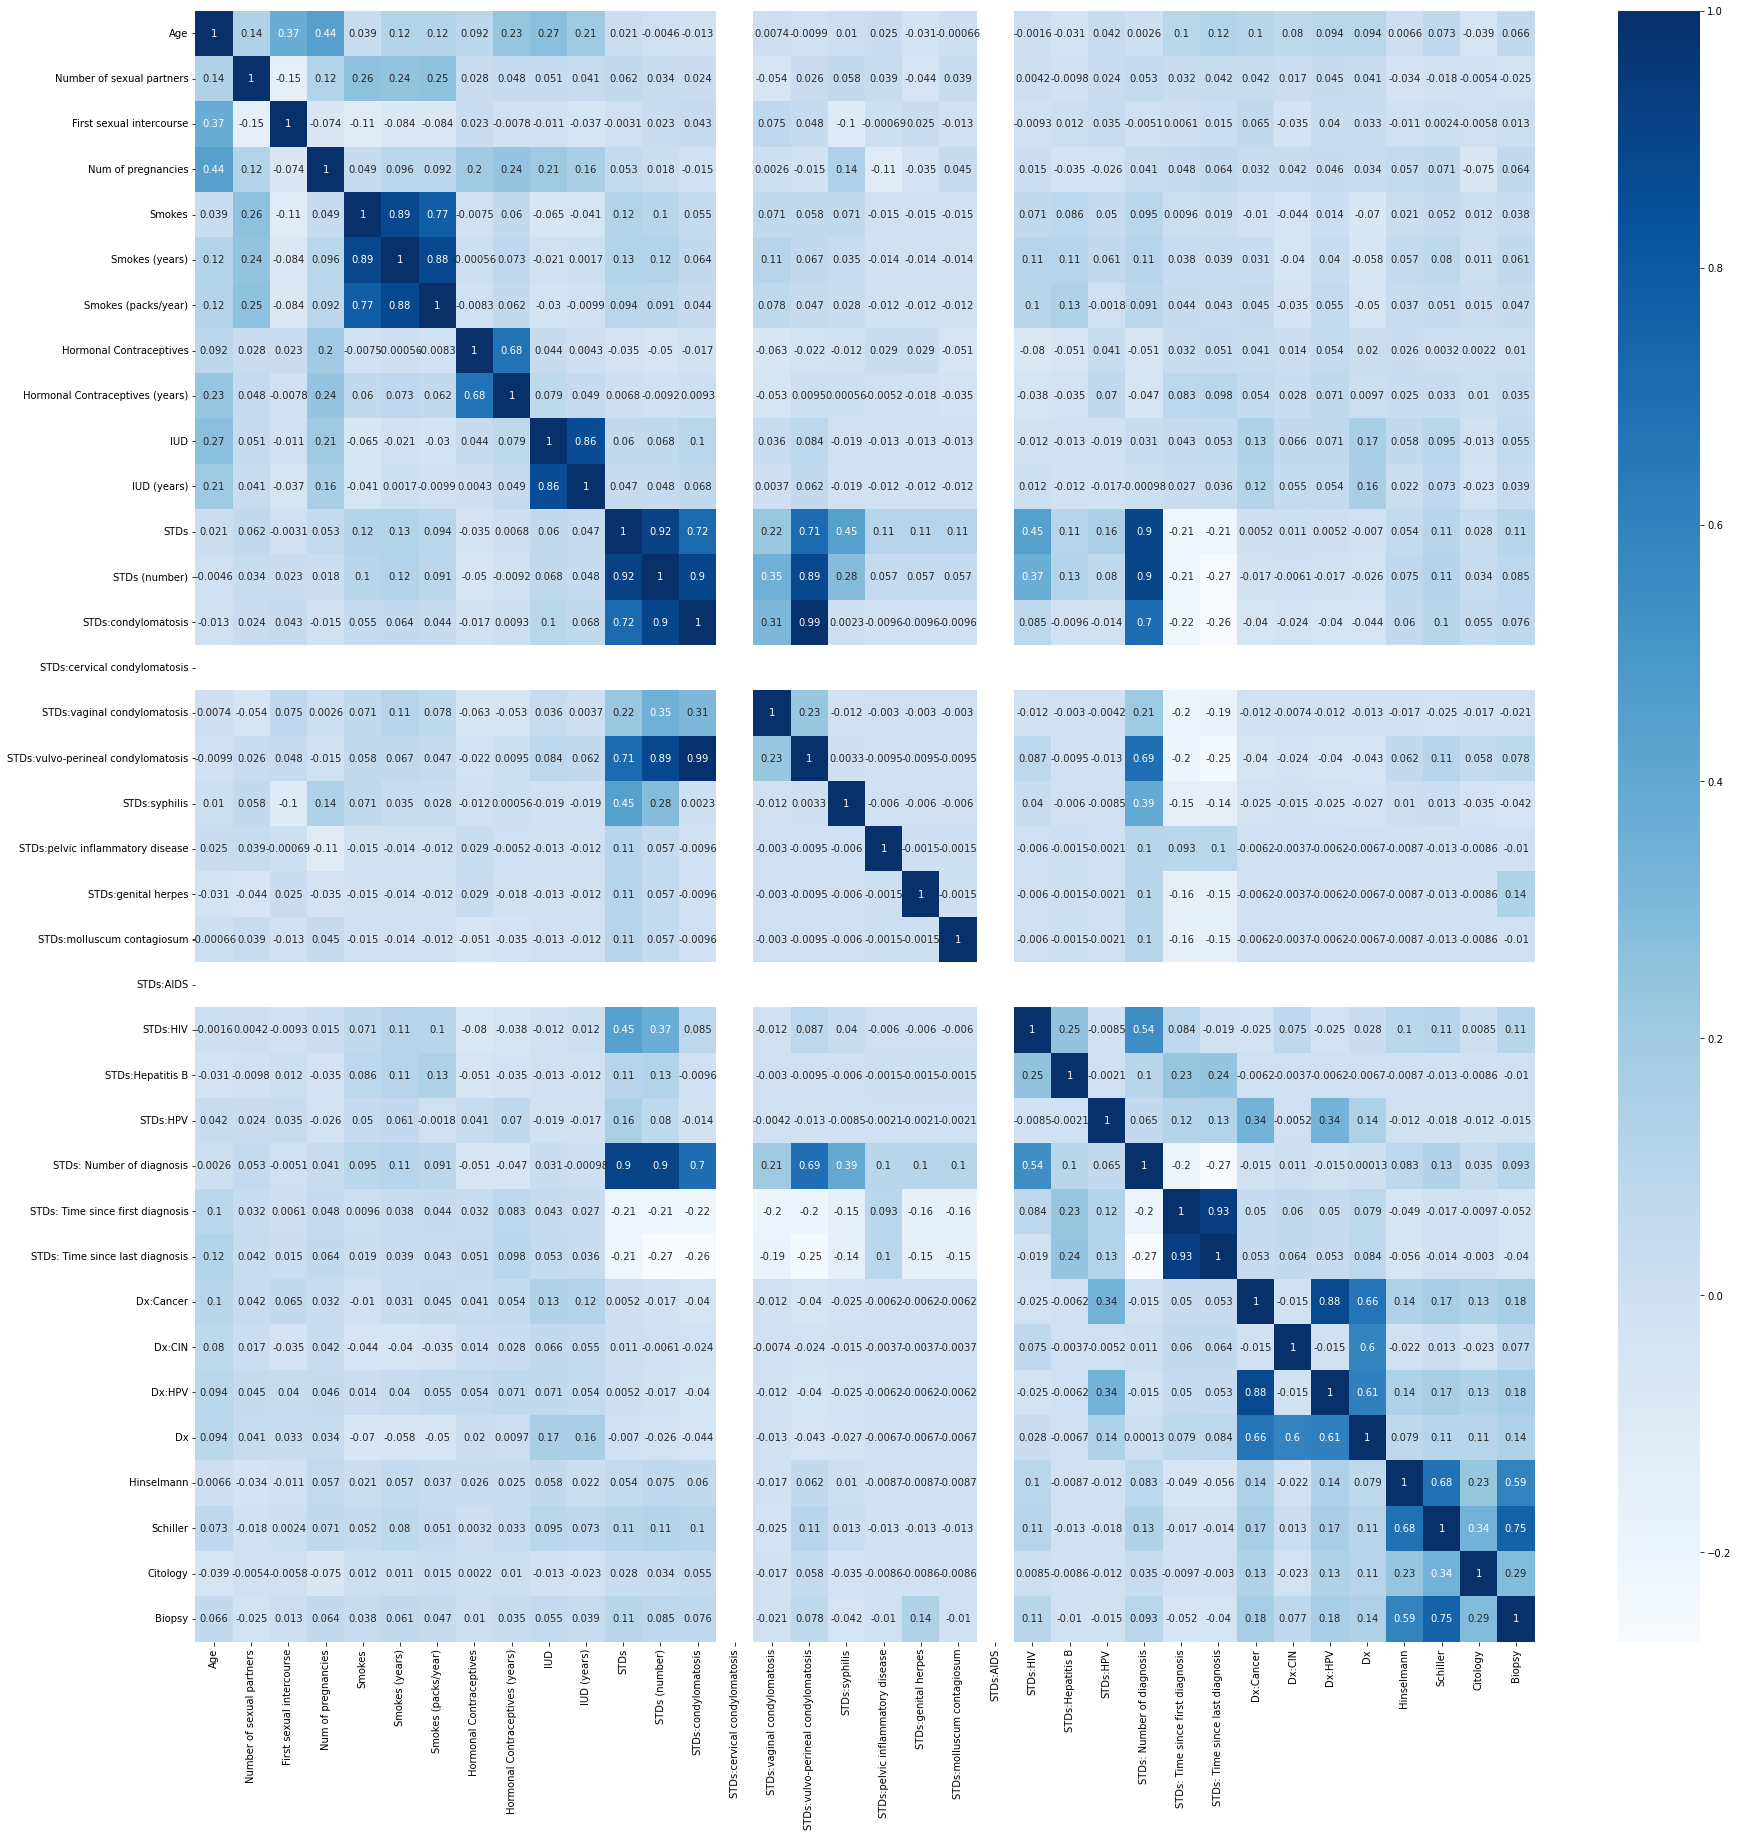

In [1198]:
# Create a correlation matrix on the imbalanced training set
corr_matrix = train_corr.corr(method = 'pearson')
top_corr_features = corr_matrix.index

# Plot the correlation matrix heat map
plt.figure(figsize=(30,30))
g=sns.heatmap(train_corr[top_corr_features].corr(),annot=True,cmap="Blues")
plt.show()

##### 2. Identifying the low correlation features

In [1199]:
# List out the correlation coefficients of the features and the target value by ascending order
corr_biopsy = pd.DataFrame(corr_matrix['Biopsy'])
corr_biopsy.sort_values("Biopsy")

,Biopsy
STDs: Time since first diagnosis,-0.051504
STDs:syphilis,-0.041909
STDs: Time since last diagnosis,-0.040426
Number of sexual partners,-0.024965
STDs:vaginal condylomatosis,-0.020767
STDs:HPV,-0.014663
STDs:molluscum contagiosum,-0.010361
STDs:pelvic inflammatory disease,-0.010361
STDs:Hepatitis B,-0.010361
Hormonal Contraceptives,0.010323


We can identify that the columns 'STDs:cervical condylomatosis' and 'STDs:AIDS' in this dataframe. On the other hand, columns 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:Hepatitis B', 'Hormonal Contraceptives' and 'First sexual intercourse' all have a low magnitude of correlation coefficient regardless of the direction, which are all not more than 0.02.



In [1200]:
drop_features = ['STDs:cervical condylomatosis','STDs:AIDS','STDs:HPV','STDs:molluscum contagiosum','STDs:pelvic inflammatory disease','STDs:Hepatitis B','Hormonal Contraceptives','First sexual intercourse']
drop_features_index = [df.columns.get_loc(col)for col in drop_features]
drop_features_index

[14, 21, 24, 20, 18, 23, 7, 2]

Thus, the identified columns to be dropped are:
- Column[2]: First sexual intercourse
- Column[7]: Hormonal Contraceptives
- Column[14]: STDs:cervical condylomatosis
- Column[18]: STDs:pelvic inflammatory disease
- Column[20]: STDs:molluscum contagiosum
- Column[21]: STDs:AIDS
- Column[23]: STDs:Hepatitis B
- Column[24]: STDs:HPV

##### 3. Drop low correlating features

In [1201]:
# Drop the identify columns in the training, validation and test set of the imbalanced data
for string in drop_features:
    X_train = X_train_std.drop(axis = 1, columns = drop_features)
    X_vald = X_vald_std.drop(axis = 1, columns = drop_features)
    X_test = X_test_std.drop(axis = 1, columns = drop_features)

In [1202]:
X_train.shape

(772, 27)

In [1203]:
X_vald.shape

(86, 27)

In [1204]:
X_test.shape

(86, 27)

In [1205]:
# Repeat for training, validation and test set of the balanced data
for string in drop_features:
    X_train_balanced = X_train_std_balanced.drop(axis = 1, columns = drop_features)
    X_vald_balanced = X_vald_std_balanced.drop(axis = 1, columns = drop_features)
    X_test_balanced = X_test_std_balanced.drop(axis = 1, columns = drop_features)

In [1206]:
X_train_balanced.shape

(1444, 27)

In [1207]:
X_vald_balanced.shape

(162, 27)

In [1208]:
X_test_balanced.shape

(162, 27)

## Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

## Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description: